## Logistic Regression

Implement a logistic regression model and a function to compute the gradient of the cross-entropy loss with respect to the parameters.

Detailed instructions: Start by defining a function `predict_prob(w, x)` that computes the predicted probability of the positive class for a given feature vector `x` and weight vector `w`. Recall that in logistic regression, the predicted probability is given by:

$$
\hat{y} = \frac{1}{1 + e^{-\langle w, x \rangle}},
$$

where $\langle w, x \rangle$ is the inner (dot) product between the parameter vector and feature vector. Next, implement a function called `compute\_gradient(ys, xs, w)` that computes the gradient of the loss function with respect to the weight vector `w`, using the true labels `ys`, and feature vectors `xs`. Define a function for the gradient of the cross-entropy loss, and verify that the implementation is correct by generating a synthetic dataset with a single feature using `numpy` and known parameters. You may find the function `numpy.random.choice` useful. Since the true parameters correspond to the generating distribution of the labels, the gradient should be close to zero at this point. Print the gradient at the true parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict probability using sigmoid function
def predict_prob(w, x):
    z = np.dot(x, w)
    return 1 / (1 + np.exp(-z))

# Function to compute the gradient of the loss function
def compute_gradient(ys, xs, w):
    y_hat = predict_prob(w, xs)
    error = y_hat - ys
    n = xs.shape[0]  # Number of samples

    # Compute gradient: note that xs.T has shape (n_features + 1, n_samples)
    gradient = (1/n) * np.dot(xs.T, error)
    return gradient

# Generate synthetic data
np.random.seed(0)
n_samples = 50
n_features = 1

# Create random features and labels
xs = np.random.rand(n_samples, n_features)
xs_with_bias = np.hstack((np.ones((n_samples, 1)), xs))  # (n_samples, n_features + 1)
ys = np.random.choice([0, 1], size=n_samples, p = [0.2, 1 - 0.2])  # Random binary labels
weights = np.array([0.7, 0.1]) # Initialize weights (including bias)

# Compute gradient at the current weights
print("The gradient at the current weights:", compute_gradient(ys, xs_with_bias, weights))

The gradient at the current weights: [0.01997642 0.03233192]


### TASK 2: 
    
Build and train a logistic regression model using gradient descent on the `heart.csv` dataset in the folder, and visualize the loss in successive training epochs. You may use `pandas`, `matplotlib`, and `numpy`.

Detailed instructions:
Begin by loading the heart disease dataset stored in `heart.csv`. Note that this dataset has categorial columns ("cp" and "restecg"), that must be converted to one-hot encoded columns. The labels, that indicate the presence or absence of heart disease, are stored in the "target" column. Split the dataset into disjoint training set (66%) and a testing set (33%).

Implement a function `grad_descent` that performs gradient descent to update the parameter vector. Include options for specifying the learning rate, tolerance for early stopping (if weights stop changing), and maximum number of iterations per training epoch. Consider how you would track convergence and decide when to stop the optimization.

Finally, train your model using gradient descent. Use a learning rate of `1e-4`, tolerance of `1e-6`, and a maximum number of iterations per training epoch of 10000. Train your model over 10 iterations, and compute and track the cross-entropy loss on the testing set after each epoch of gradient descent. Use the function `predict_prob` from **TASK1** to return the predicted probability for a given set of inputs. Plot the loss values over multiple epochs to visualize how the model converges.

Epoch 1/100, Test Loss: 0.5249414631931304
Epoch 2/100, Test Loss: 0.47061891538512496
Epoch 3/100, Test Loss: 0.4474991944159893
Epoch 4/100, Test Loss: 0.4360897598674043
Epoch 5/100, Test Loss: 0.4300628640662514
Epoch 6/100, Test Loss: 0.4268387857469634
Epoch 7/100, Test Loss: 0.4251955018407995
Epoch 8/100, Test Loss: 0.42449137245703544
Epoch 9/100, Test Loss: 0.4243638812862008
Epoch 10/100, Test Loss: 0.4245969436954786
Epoch 11/100, Test Loss: 0.42505653204979105
Epoch 12/100, Test Loss: 0.42565701094032116
Epoch 13/100, Test Loss: 0.4263424530512529
Epoch 14/100, Test Loss: 0.4270757604803903
Epoch 15/100, Test Loss: 0.42783207847301646
Epoch 16/100, Test Loss: 0.4285946776615716
Epoch 17/100, Test Loss: 0.42935231008108843
Epoch 18/100, Test Loss: 0.43009747332314346
Epoch 19/100, Test Loss: 0.4308252495054252
Epoch 20/100, Test Loss: 0.4315325165123897
Epoch 21/100, Test Loss: 0.4322174051194663
Epoch 22/100, Test Loss: 0.4328789212945068
Epoch 23/100, Test Loss: 0.4335166

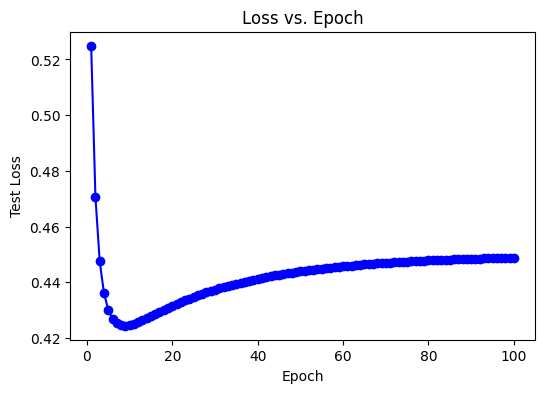

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url_heart = 'https://raw.githubusercontent.com/kpc-simone/cs480-f24/refs/heads/main/assignments/a2/heart.csv'
data = pd.read_csv(url_heart)

# Splitting training and testing data
split_ratio = 0.66
n_samples, n_features = data.shape
n_train = int(split_ratio * n_samples)
X_train, X_test = data.iloc[:n_train, :-1].values, data.iloc[n_train:, :-1].values
y_train, y_test = data.iloc[:n_train, -1].values, data.iloc[n_train:, -1].values

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Small value to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def grad_descent(X, y, weights, bias, learning_rate=1e-4, tol=1e-6, max_iter=10000):
    m, n = X.shape
    losses = []

    for i in range(max_iter):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)

    return weights, bias, losses

# Main training loop for multiple epochs
def train_model(X_train, y_train, X_test, y_test, epochs=1, learning_rate=1e-4, tol=1e-6, max_iter=10000):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0
    epoch_losses = []

    for epoch in range(epochs):
        # Run gradient descent for one epoch
        weights, bias, losses = grad_descent(X_train, y_train, weights, bias, learning_rate, tol, max_iter)

        # Track the loss on the test set after each epoch
        y_test_pred = predict_prob(X_test, weights, bias)
        epoch_loss = cross_entropy_loss(y_test, y_test_pred)
        epoch_losses.append(epoch_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Test Loss: {epoch_loss}')

    return weights, bias, epoch_losses

# Predict probability using learned weights
def predict_prob(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z)

weights, bias, epoch_losses = train_model(X_train, y_train, X_test, y_test, epochs=100)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.title('Loss vs. Epoch')
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.show()